In [63]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import os
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score,precision_score,recall_score,confusion_matrix
import cv2
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV 

# Reading photos from files

In [22]:
from PIL import Image
categories=["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
new_flatten_photos=[] # list of np arrays
tumor_name=[]
training_data_path=r"C:\Users\arwah\OneDrive\سطح المكتب\Machine\Brain_tumor\Training"
# starting to enter each file
for category in categories:
    file_path=os.path.join(training_data_path,category)
    # print(file_path)
    images_names=os.listdir(file_path)
    # print(images_pathes)
    for image in images_names:
     image_path=os.path.join(file_path,image)
     #print(image_path)

     with Image.open(image_path) as image:
        image=image.convert("L")
        resized_image=image.resize((150,150))
        flatten_image=np.array(resized_image).flatten() 
        # convert each photo to one d array preparing for converting it to data frame
        new_flatten_photos.append(flatten_image)
        tumor_name.append(category)

new_flatten_photos_as_np_array=np.array(new_flatten_photos)


'\nIf you want to reshape your array to a specific dimension,\n the total number of elements should match the product of the dimensions. \n For example, your array has 67500 elements. If you need to reshape it into ***two dimensions***,\n make sure the product of those dimensions equals 67500\n\n\nWhen you flattened the images, they originally had the shape (150, 150, 3).\nFlattening this results in a 1D array of size 67,500 (i.e., 150 * 150 * 3).\nTherefore, reshaping back to (150,150,3) works without any issues, as the total number of elements remains the same.\n'

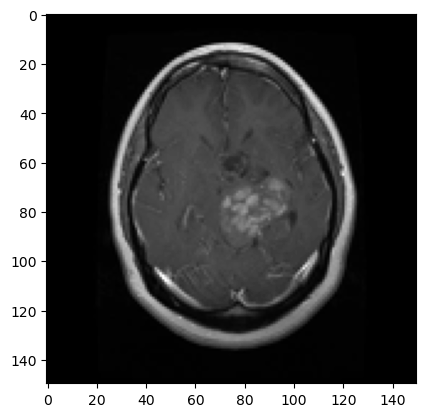

In [23]:
new_flatten_photos_as_np_array[0]
plt.imshow(new_flatten_photos_as_np_array[0].reshape(150,150),cmap="gray")
'''
If you want to reshape your array to a specific dimension,
 the total number of elements should match the product of the dimensions. 
 For example, your array has 67500 elements. If you need to reshape it into ***two dimensions***,
 make sure the product of those dimensions equals 67500


When you flattened the images, they originally had the shape (150, 150, 3).
Flattening this results in a 1D array of size 67,500 (i.e., 150 * 150 * 3).
Therefore, reshaping back to (150,150,3) works without any issues, as the total number of elements remains the same.
'''

# convert array to Dataframe

In [24]:
data_train=pd.DataFrame(new_flatten_photos_as_np_array)
data_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22460,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,8,6,7,6,7,9,11,11,11,11,12,11,10,8,7,7,6,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,23,24,23,20,24,20,14,14,14,14,16,19,26,30,31,34,33,30,26,22,14,8,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,27,28,26,26,25,31,35,33,25,18,15,14,16,19,21,25,33,31,28,28,27,25,20,9,5,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2865,0,0,1,1,1,1,1,1,1,1,1,1,2,2,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,2,4,3,...,30,30,29,19,6,5,3,2,4,3,3,2,3,3,2,2,2,2,3,2,2,2,2,2,2,2,0,0,0,1,1,1,1,0,0,0,1,1,1,1
2866,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,...,29,27,29,17,3,2,2,2,2,3,3,2,2,2,2,2,1,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
2867,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,...,31,29,28,21,7,3,4,3,2,3,3,3,4,2,2,2,2,2,2,2,2,2,2,2,1,1,1,2,1,1,1,1,1,1,1,1,1,1,0,0
2868,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,3,...,10,10,8,9,8,7,6,9,13,12,15,13,13,9,2,1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0


In [25]:
data_train["tumor_name"]=tumor_name
data_train.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,tumor_name
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,glioma_tumor
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,glioma_tumor
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8,6,7,6,7,9,11,11,11,11,12,11,10,8,7,7,6,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,glioma_tumor
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,23,20,24,20,14,14,14,14,16,19,26,30,31,34,33,30,26,22,14,8,4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,glioma_tumor
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28,26,26,25,31,35,33,25,18,15,14,16,19,21,25,33,31,28,28,27,25,20,9,5,3,1,1,1,1,1,1,1,1,1,1,1,0,0,0,glioma_tumor


# same process on test data set 

In [26]:
from PIL import Image
categories=["glioma_tumor","meningioma_tumor","no_tumor","pituitary_tumor"]
new_flatten_photos_test=[] # list of np arrays
tumor_name_test=[]
testing_data_path=r"C:\Users\arwah\OneDrive\سطح المكتب\Machine\Brain_tumor\Testing"
# starting to enter each file
for category in categories:
    file_path=os.path.join(testing_data_path,category)
    # print(file_path)
    images_names=os.listdir(file_path)
    # print(images_pathes)
    for image in images_names:
     image_path=os.path.join(file_path,image)
     #print(image_path)

     with Image.open(image_path) as image:
        image=image.convert("L")
        resized_image=image.resize((150,150))
        flatten_image=np.array(resized_image).flatten() 
        # convert each photo to one d array preparing for converting it to data frame
        new_flatten_photos_test.append(flatten_image)
        tumor_name_test.append(category)

new_flatten_photos_as_np_array_test=np.array(new_flatten_photos_test)


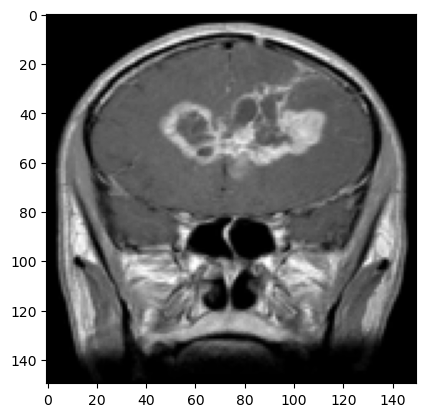

In [27]:
new_flatten_photos_as_np_array_test[0]
plt.imshow(new_flatten_photos_as_np_array_test[0].reshape(150,150),cmap="gray")

In [28]:
data_test=pd.DataFrame(new_flatten_photos_as_np_array_test)
data_test["tumor_name"]=tumor_name_test
data_test.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,22461,22462,22463,22464,22465,22466,22467,22468,22469,22470,22471,22472,22473,22474,22475,22476,22477,22478,22479,22480,22481,22482,22483,22484,22485,22486,22487,22488,22489,22490,22491,22492,22493,22494,22495,22496,22497,22498,22499,tumor_name
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,glioma_tumor
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,5,13,12,14,14,5,1,1,0,0,0,0,0,0,0,0,0,glioma_tumor
2,7,7,7,6,5,3,3,3,4,4,4,3,4,5,5,3,3,3,4,3,2,3,3,3,5,6,8,7,4,4,5,7,6,7,5,4,4,5,6,5,...,4,6,5,4,6,8,6,4,6,5,4,5,5,4,6,5,4,2,2,6,7,5,6,6,4,4,4,3,4,5,5,5,5,5,4,4,4,5,5,glioma_tumor
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,7,7,7,8,8,8,8,6,5,6,7,7,7,7,7,8,8,7,7,7,8,8,8,10,12,8,3,1,0,0,0,0,0,0,0,0,0,0,glioma_tumor
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,6,7,7,7,8,8,8,8,6,5,6,7,7,7,7,7,8,8,7,7,7,8,8,8,10,12,8,3,1,0,0,0,0,0,0,0,0,0,0,glioma_tumor


In [29]:
x_train=data_train.drop(["tumor_name"],axis=1)
x_test=data_test.drop(["tumor_name"],axis=1)
y_train=data_train["tumor_name"]
y_test=data_test["tumor_name"]

In [30]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
#عايز يضمن انه 
# eigen vectors for train = for test 
# عشان سيقة في نفس ال space 

In [31]:
y_train.value_counts() #minority class = no tumor

tumor_name
pituitary_tumor     827
glioma_tumor        826
meningioma_tumor    822
no_tumor            395
Name: count, dtype: int64

# Apply PCA

In [32]:
pca=PCA(n_components=.85)
pca_train=pca.fit_transform(x_train_scaled)
pca_test=pca.transform(x_test_scaled)

pca_train.shape,pca_test.shape

((2870, 272), (394, 272))

In [46]:
model=LogisticRegression(max_iter=3000)
model.fit(pca_train,y_train)
print(model.score(pca_train,y_train))
print(model.score(pca_test,y_test))

0.9463414634146341
0.6802030456852792


c:\Users\arwah\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [47]:
model_2=RandomForestClassifier()
model_2.fit(pca_train,y_train)
print(model_2.score(pca_train,y_train))
print(model_2.score(pca_test,y_test))

1.0
0.7385786802030457


In [48]:
y_predicted=model_2.predict(pca_test)
matrix=confusion_matrix(y_test,y_predicted)
matrix


array([[ 19,  38,  28,  15],
       [  0, 115,   0,   0],
       [  0,   0, 105,   0],
       [  2,  12,   8,  52]], dtype=int64)

<Axes: >

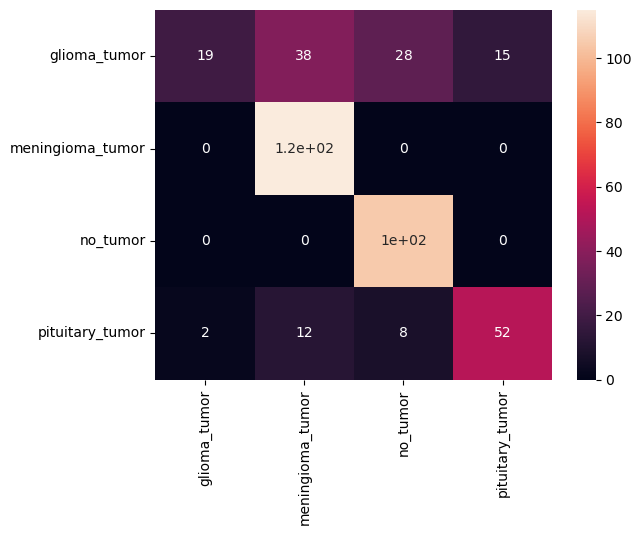

In [49]:
import seaborn as sns
sns.heatmap(matrix,annot=True,xticklabels=categories,yticklabels=categories)



In [41]:
data_test["tumor_name"].value_counts()

tumor_name
meningioma_tumor    115
no_tumor            105
glioma_tumor        100
pituitary_tumor      74
Name: count, dtype: int64

In [57]:
print("f score is: ",f1_score(y_test,y_predicted,average="macro"))
print("percision_score: ",precision_score(y_test,y_predicted,average="macro"))
print("recall_score: ",recall_score(y_test,y_predicted,average="macro"))



f score is:  0.6816813368182666
percision_score:  0.7806329639451266
recall_score:  0.7231756756756756


# Hyper parameter tuning 

# Grid search

In [59]:
model_2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(pca_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best Parameters:", best_params)
print("Best Model:", best_model)


Best Parameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
Best Model: RandomForestClassifier(max_depth=30, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=300)


In [62]:
grid_search.score(pca_test,y_test)

0.7284263959390863

In [66]:
grid_space={
    "C":[1,10,20],
    "kernel":["rbf"],
    "gamma":[1,0.1,0.01],
}
n_svc=GridSearchCV(estimator=SVC(),param_grid=grid_space)
n_svc.fit(pca_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']})

In [67]:
n_svc.score(pca_test,y_test)

0.8527918781725888

In [69]:
best_parameter=n_svc.best_params_
best_parameter

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}